<a href="https://colab.research.google.com/github/GrindelfP/beatles-project/blob/main/MS_task1_imitation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports

In [25]:
import matplotlib.pyplot as plt
import math

## Constants

In [26]:
dt: float = 0.0001 # time period
a: int = 10 # side
v0: int = 10 # velocity
iterations: int = int(a / dt)

## Position class

In [27]:
class Position:
  def __init__(self, x, y):
    self.x = x
    self.y = y

## Coordinate formulae

In [28]:
def get_alpha(position: Position) -> float:
  x1 = position.x
  y1 = position.y
  x2 = a - y1
  y2 = x1

  return math.atan2((y2 - y1), (x2 - x1))


def get_next_position(position: Position, alpha: float) -> Position:
  # capture previous coordinates, which will be updated
  xp = position.x
  yp = position.y

  return Position(xp + v0 * dt * math.cos(alpha), yp + v0 * dt * math.sin(alpha))


## Traceing the beatles

In [29]:
# placing the beatles on their initial positions
b1: Position = Position(0.0, 0.0)
b2: Position = Position(10.0, 0.0)
b3: Position = Position(10.0, 10.0)
b4: Position = Position(0.0, 10.0)

# initializing beatles' positions sequences
b1_positions: list = [b1]
b2_positions: list = [b2]
b3_positions: list = [b3]
b4_positions: list = [b4]

for i in range(iterations):
  current_beatle_position = b1_positions[-1] # last position in trace
  alpha = get_alpha(current_beatle_position) # alpha is common due to symmetry
  b1_positions.append(get_next_position(current_beatle_position, alpha))
  # calculating the remaining beatles positions symetrically
  b2_positions.append(Position(a - b1_positions[-1].y, b1_positions[-1].x))
  b3_positions.append(Position(a - b2_positions[-1].y, b2_positions[-1].x))
  b4_positions.append(Position(a - b3_positions[-1].y, b3_positions[-1].x))


## Plotting

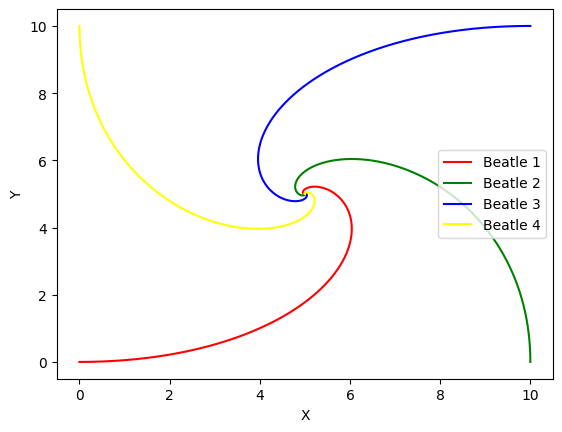

In [30]:
# Create a figure and axis.
fig, ax = plt.subplots()

# Extract the x and y coordinates for each beatle.
b1_x: list = []
b1_y: list = []
b2_x: list = []
b2_y: list = []
b3_x: list = []
b3_y: list = []
b4_x: list = []
b4_y: list = []
for i in range(len(b1_positions)):
  b1_x.append(b1_positions[i].x)
  b1_y.append(b1_positions[i].y)
  b2_x.append(b2_positions[i].x)
  b2_y.append(b2_positions[i].y)
  b3_x.append(b3_positions[i].x)
  b3_y.append(b3_positions[i].y)
  b4_x.append(b4_positions[i].x)
  b4_y.append(b4_positions[i].y)

# Plot the four lines with different colors.
ax.plot(b1_x, b1_y, color='red', label='Beatle 1')
ax.plot(b2_x, b2_y, color='green', label='Beatle 2')
ax.plot(b3_x, b3_y, color='blue', label='Beatle 3')
ax.plot(b4_x, b4_y, color='yellow', label='Beatle 4')

# Set the axis labels.
ax.set_xlabel('X')
ax.set_ylabel('Y')

# Add a legend.
ax.legend()

# Show the plot.
plt.show()